#### 1) Setup & Data Loading

* Importe the Palmer's Penguins dataset from Kaggle

In [2]:
#Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
data = pd.read_csv('penguins.csv')
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Q1** (check): How many rows and columns does the dataset have? Which columns are numeric vs categorical?

In [6]:
#Your code here
print("rows, columns:", data.shape)

numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

print("Numeric column:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

rows, columns: (344, 9)
Numeric column: ['rowid', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
Categorical columns: ['species', 'island', 'sex']


#### 2) Basic EDA (Exploratory Data Analysis)

**Q2**: Which columns contain missing values? What strategy will you use to handle them?

In [17]:
#Your code here
print(data.isnull().sum())


rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


**Q3**: Is the dataset balanced across the three species?

In [18]:
#Your code here
print(data['species'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


#### 3) Data Cleaning & Encoding

* We’ll keep only rows with complete values for simplicity.

In [10]:
#Your code here
data_clean = data.dropna().copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


**Q4**: Why don’t we need to scale features for Decision Trees?

In [ ]:
#Your code here
#dataset bien fait

#### 4) Train/Test Split

**Q5**: Why do we use stratify=y in this split?

In [11]:
#Your code here
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x = data_clean[feature_cols]
y = data_clean['species']


X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### 5) Baseline Decision Tree

Train accuracy: 1.0
Test accuracy : 0.9552238805970149


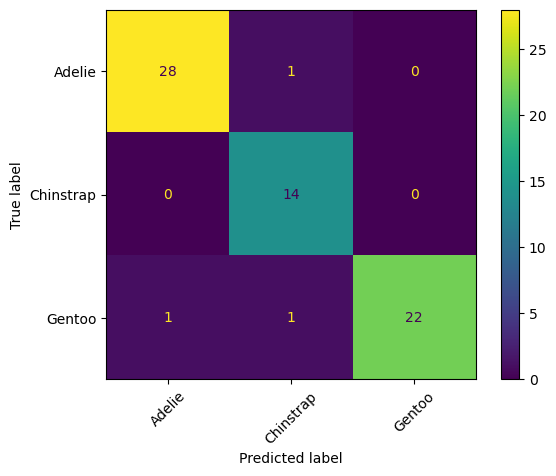

In [ ]:
#Your code here

baseline_tree = DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train, y_train)


y_train_pred = baseline_tree.predict(X_train)
y_test_pred = baseline_tree.predict(X_test)


print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy :", accuracy_score(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred, labels=baseline_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=baseline_tree.classes_)
disp.plot()
plt.xticks(rotation=45)
plt.show()

**Q6**: Which classes are the most/least confounded? What might cause that?

#### 6) Visualize the Tree

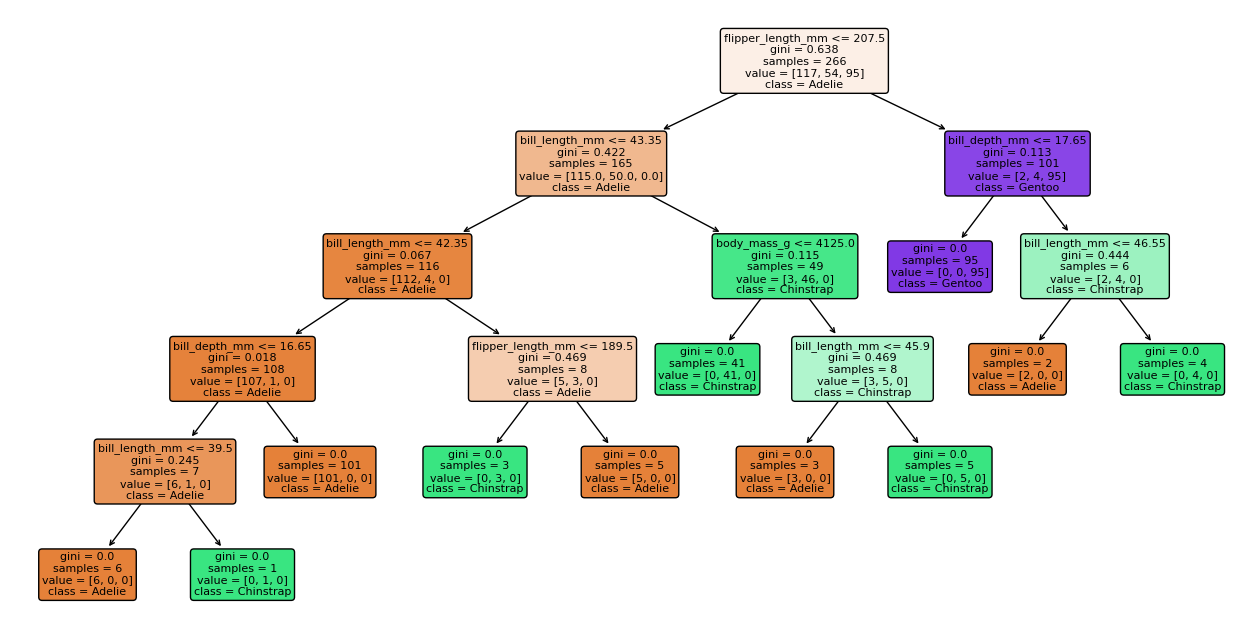

In [13]:
#your code here
plt.figure(figsize=(16, 8))
plot_tree(
    baseline_tree,
    feature_names=feature_cols,
    class_names=baseline_tree.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

**Q7**: What is the root split (feature and threshold)? Why do you think the algorithm chose it?

#### 7) Decision Boundaries (2D View)
* Pick two features (e.g., bill_length_mm vs bill_depth_mm) and visualize the decision surface.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


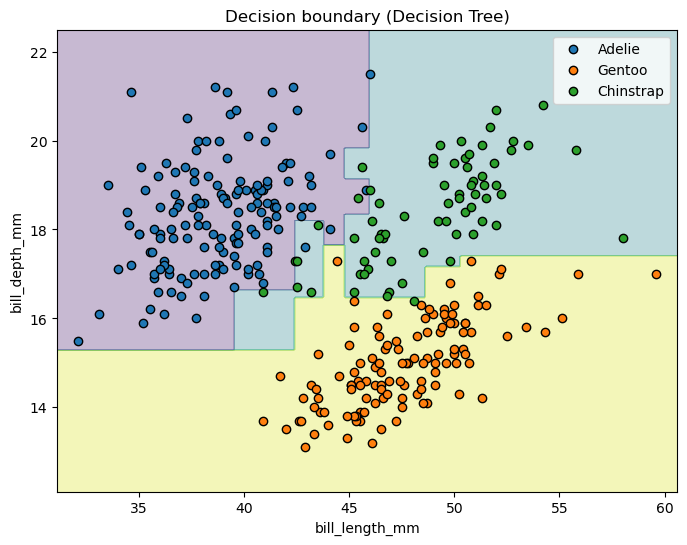

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

feat1 = 'bill_length_mm'
feat2 = 'bill_depth_mm'

X_2d = data_clean[[feat1, feat2]]
y_2d = data_clean['species']

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d,
    test_size=0.2,
    random_state=42,
    stratify=y_2d
)

tree_2d = DecisionTreeClassifier(random_state=42)
tree_2d.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d[feat1].min() - 1, X_2d[feat1].max() + 1
y_min, y_max = X_2d[feat2].min() - 1, X_2d[feat2].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

species_to_int = {sp: i for i, sp in enumerate(tree_2d.classes_)}
Z_num = np.vectorize(species_to_int.get)(Z).astype(float)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_num, alpha=0.3)

for species_name in y_2d.unique():
    idx = y_2d == species_name
    plt.scatter(
        X_2d.loc[idx, feat1],
        X_2d.loc[idx, feat2],
        label=species_name,
        edgecolor='k'
    )

plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend()
plt.title("Decision boundary (Decision Tree)")
plt.show()

**Q8**: Do the boundaries look axis-aligned? Why is that a natural property of Decision Trees?

#### 8) Hyperparameter Tuning with GridSearchCV

In [ ]:
#You code here

param_grid = {
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

best_tree = grid_search.best_estimator_

y_test_pred_best = best_tree.predict(X_test)
print("Test accuracy (best model):", accuracy_score(y_test, y_test_pred_best))


Best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy: 0.9773584905660379
Test accuracy (best model): 0.9402985074626866


**Q9**: Which hyperparameters changed compared to the baseline? How did test accuracy change?

**Q10**: If CV accuracy is much higher than test accuracy, what could be happening?

In [ ]:
'''
Q9:
max_depth, min_samples_split, min_samples_leaf, criterion(parfois)
Q10:
on peut avoir un overfitting si les hyperparametres sont mal choisis
'''

#### 9) Model Interpretation

In [ ]:
#Your code here

importances = best_tree.feature_importances_
for feat, imp in zip(feature_cols, importances):
    print(f"{feat}: {imp:.3f}")

sample = X_test.iloc[[0]]
print("\nÉchantillon testé :\n", sample)
print("Vraie espèce :", y_test.iloc[0])

proba = best_tree.predict_proba(sample)
print("\nProbabilités prédites :", proba)
print("Ordre des classes :", best_tree.classes_)

bill_length_mm: 0.304
bill_depth_mm: 0.125
flipper_length_mm: 0.549
body_mass_g: 0.022

Échantillon testé :
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
262            50.5           15.2              216.0       5000.0
Vraie espèce : Gentoo

Probabilités prédites : [[0. 0. 1.]]
Ordre des classes : ['Adelie' 'Chinstrap' 'Gentoo']


**Q11**: Which feature is most important? Is that consistent with your EDA intuition?

**Q12**: For the inspected sample, does the class probability look confident? Why/why not?

In [ ]:
'''
Q11:
flipper_length_mm, c'est cohérent avec
Q12:
l'èspèce gento a une probabilité proche de 1 donc on est confiant dans la prédiction mais parfois il peut y avoir des erreurs si les données sont proches de la frontière de décision
'''

#### 10) (Optional) Add Categorical Features & Compare

In [20]:
#Your code here
data_full = data_clean.copy()
data_full = pd.get_dummies(data_full, columns=['island', 'sex'], drop_first=True)

feature_cols_full = [col for col in data_full.columns if col != 'species']
X_full = data_full[feature_cols_full]
y_full = data_full['species']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train_full, y_train_full)

y_pred_full = tree_full.predict(X_test_full)
print("Test accuracy (avec island/sex) :", accuracy_score(y_test_full, y_pred_full))

Test accuracy (avec island/sex) : 0.9850746268656716


**Q13**: Did adding island/sex help? Why might these variables be informative for species?

In [21]:
# oui island/sex aide je pense le résultat car cela ajoute des informations supplémentaires sur les conditions de vie des manchots qui peuvent influencer leurs caractéristiques physiques et donc leur classification en espèces.

#### 11) Reflection & Reporting

Write a short reflection (5–10 lines):
- Compare Decision Tree vs KNN on this dataset.
-  Where does the tree overfit? How did pruning/tuning impact generalization?
- Which 2D feature pair gave the clearest separation? Why?

In [24]:
'''
Je pense que l'arbre de décision et KNN obtiennent de bonnes performances car ce sont des modèles capables de capturer des relations non linéaires entre les caractéristiques et les classes.
L'arbre a tendence à overfitter alors que la recherche d'hyperparamètres permet une meilleiure généralisation
La paire de variables est flipper_length_mm vs body_mass_g 
Ces deux mesures sont liées à la taille globale du manchot : l’espèce Gentoo est nettement plus lourde et possède des nageoires plus longues que Chinstrap et Adelie
'''


"\nJe pense que l'arbre de décision et KNN obtiennent de bonnes performances car ce sont des modèles capables de capturer des relations non linéaires entre les caractéristiques et les classes.\nL'arbre a tendence à overfitter alors que la recherche d'hyperparamètres permet une meilleiure généralisation\nLa paire de variables est flipper_length_mm vs body_mass_g \nCes deux mesures sont liées à la taille globale du manchot : l’espèce Gentoo est nettement plus lourde et possède des nageoires plus longues que Chinstrap et Adelie\n"